In [1]:
%cd ..\src
!python setup.py develop

c:\Users\mscer\dev\EchoVPR\src
running develop
running egg_info
writing echovpr.egg-info\PKG-INFO
writing dependency_links to echovpr.egg-info\dependency_links.txt
writing top-level names to echovpr.egg-info\top_level.txt
reading manifest file 'echovpr.egg-info\SOURCES.txt'
writing manifest file 'echovpr.egg-info\SOURCES.txt'
running build_ext
Creating c:\users\mscer\anaconda3\envs\patchnetvlad\lib\site-packages\echovpr.egg-link (link to .)
echovpr 1.0 is already the active version in easy-install.pth

Installed c:\users\mscer\dev\echovpr\src
Processing dependencies for echovpr==1.0
Finished processing dependencies for echovpr==1.0


C:\Users\mscer\anaconda3\envs\patchnetvlad\lib\site-packages\setuptools\command\easy_install.py:156: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\mscer\anaconda3\envs\patchnetvlad\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(


In [2]:
import torch
from torch.utils.data import DataLoader

from configs.utils import get_config
from echovpr.datasets.oxford_image_ds import OxfordImageDataset
from echovpr.datasets.utils import save_np_file, load_np_file
from echovpr.models.netvlad_encoder import NetVLADEncorder

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
config = get_config("configs\\train_mlp_oxford.ini", log=False)

In [4]:
day_ds = load_np_file(config['dataset_oxford_day_dataset_file_path'])
night_ds = load_np_file(config['dataset_oxford_night_dataset_file_path'])

In [5]:
day_dataset = OxfordImageDataset(day_ds['image_names'], config['dataset_root_dir'], config)
day_dataLoader = DataLoader(day_dataset, batch_size=int(config['dataset_netvlad_processing_batchsize']), num_workers=int(config['dataset_netvlad_processing_threads']), shuffle=False)

night_dataset = OxfordImageDataset(night_ds['image_names'], config['dataset_root_dir'], config)
night_dataLoader = DataLoader(night_dataset, batch_size=int(config['dataset_netvlad_processing_batchsize']), num_workers=int(config['dataset_netvlad_processing_threads']), shuffle=False)

Number of images loaded: 4599
Number of images loaded: 4550


In [6]:
def preview_images(dataset, image_id):
    raw_img = dataset.get_image(image_id)
    transformed_img = np.transpose(dataset.get_transformed_image(image_id), (1, 2, 0))

    plt.figure()
    f, axarr = plt.subplots(1,2) 
    axarr[0].imshow(raw_img)
    axarr[1].imshow(transformed_img)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1800x1200 with 0 Axes>

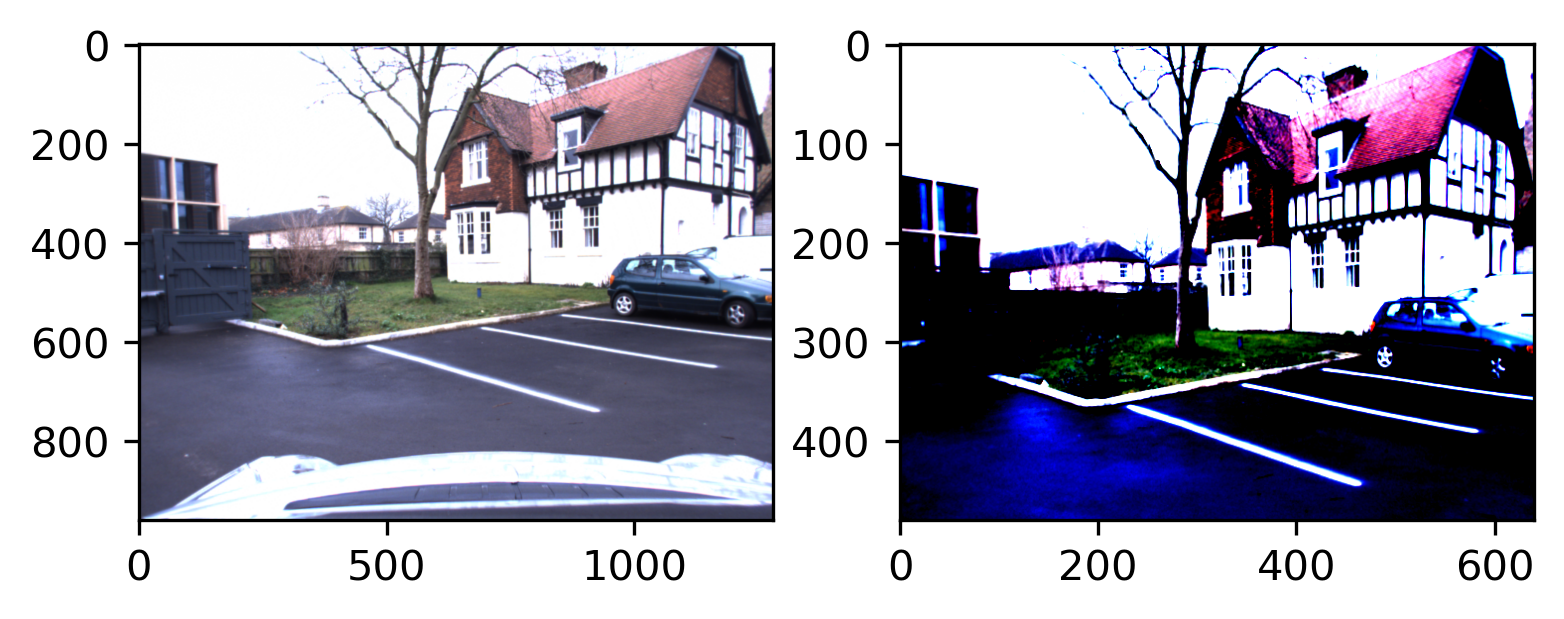

In [7]:
preview_images(day_dataset, 20)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1800x1200 with 0 Axes>

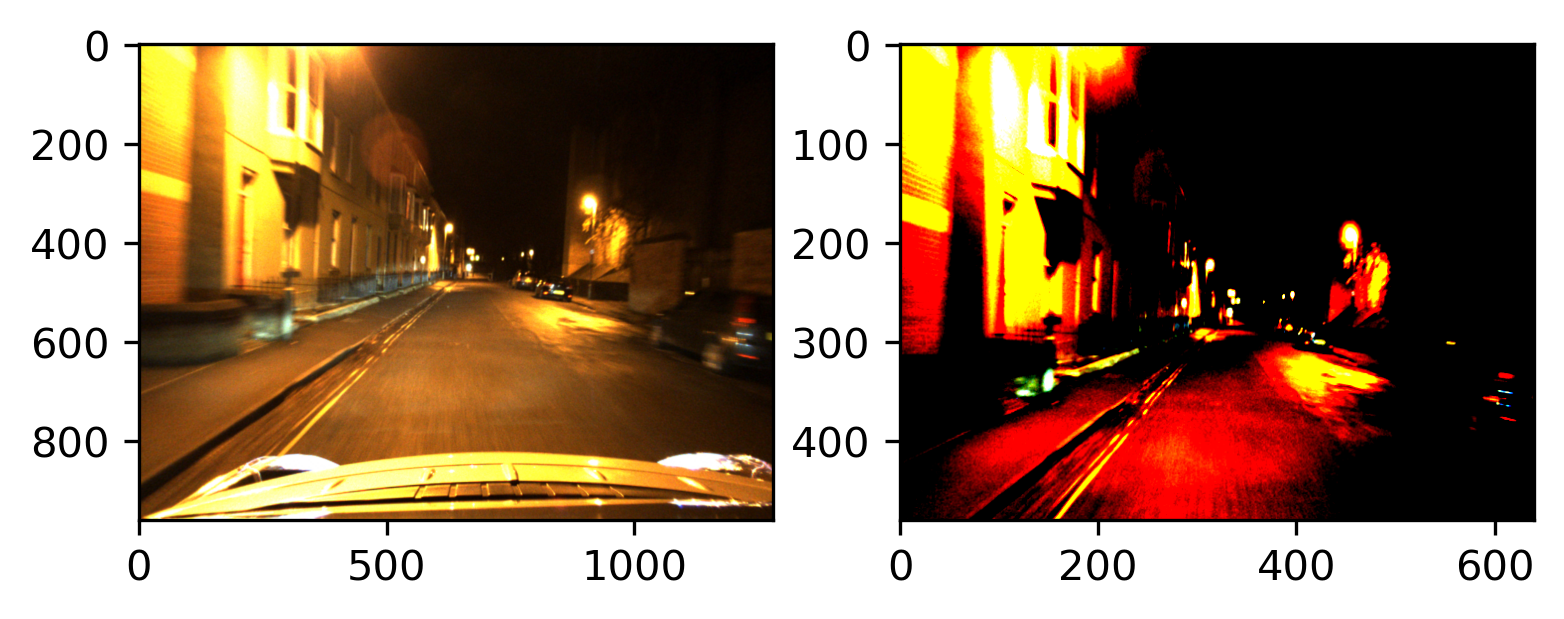

In [9]:
preview_images(night_dataset, 1500)

In [ ]:
encoder = NetVLADEncorder(config).eval().cuda()

In [ ]:
def process(model, dataLoader):
    x_processed_list = []

    for x in dataLoader:
        x = x.cuda()
        x_processed = model(x)

        x_processed_list.append(x_processed.cpu())

    return torch.vstack(x_processed_list)

In [ ]:
oxford_day_repr = process(encoder, day_dataLoader).numpy()
save_np_file(oxford_day_repr, config['dataset_oxford_day_netvlad_repr_file_path'])

In [ ]:
oxford_night_repr = process(encoder, night_dataLoader).numpy()
save_np_file(oxford_night_repr, config['dataset_oxford_night_netvlad_repr_file_path'])